<a href="https://colab.research.google.com/github/thekaveez/kaveez-DL/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thekaaveez
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 3.46MB/s]

In [5]:
data = pd.read_csv("random-linear-regression/test.csv")

In [6]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [7]:
data.shape

(300, 2)

In [8]:
X = data['x']
y = data['y']

In [9]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


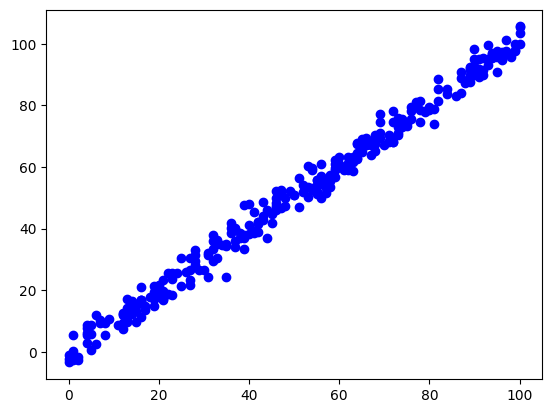

In [10]:
plt.scatter(X,y, c='b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240,), (60,), (240,), (60,))

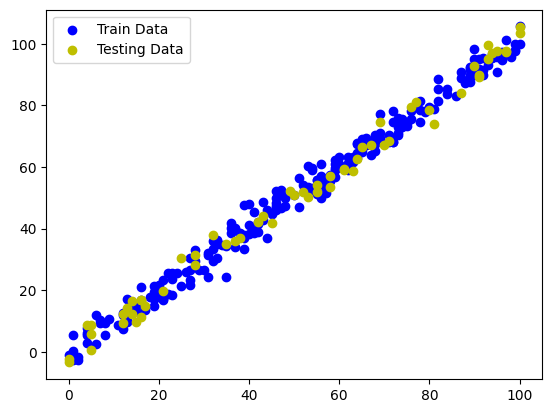

In [13]:
plt.scatter(X_train, y_train, c='b', label = 'Train Data')
plt.scatter(X_test, y_test, c='y', label = 'Testing Data')
plt.legend()
plt.show()

#Model Building

In [40]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics = ['mae'])


# train model
epoch_number = 10
history = model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs = epoch_number)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 48.4298 - mae: 48.4298
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9490 - mae: 10.9490
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8322 - mae: 4.8322 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6149 - mae: 3.6149 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9044 - mae: 2.9044 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8182 - mae: 3.8182 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2702 - mae: 5.2702 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6889 - mae: 3.6889 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7936 - mae: 4.7936 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1077 - mae: 4.1077 


In [32]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [33]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[87.89375  ],
       [74.17317  ],
       [91.81391  ],
       [ 4.5902467],
       [88.873795 ]], dtype=float32)

In [34]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


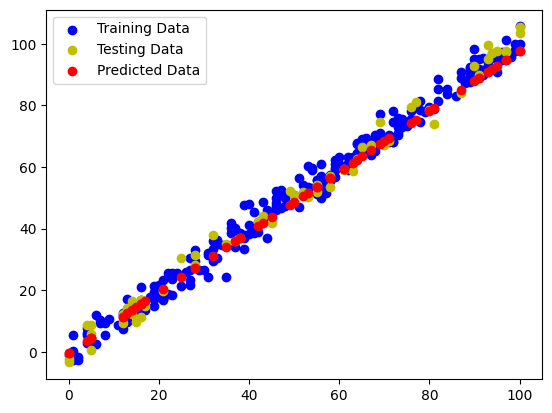

In [35]:
plt.scatter(X_train, y_train, c='b', label = 'Training Data')
plt.scatter(X_test, y_test, c='y', label = 'Testing Data')
plt.scatter(X_test, y_pred, c='r', label = 'Predicted Data')
plt.legend()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 2.9177 - mae: 2.9177


[2.745711326599121, 2.745711326599121]

In [37]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.745711>

In [41]:
mae = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=12.262167>

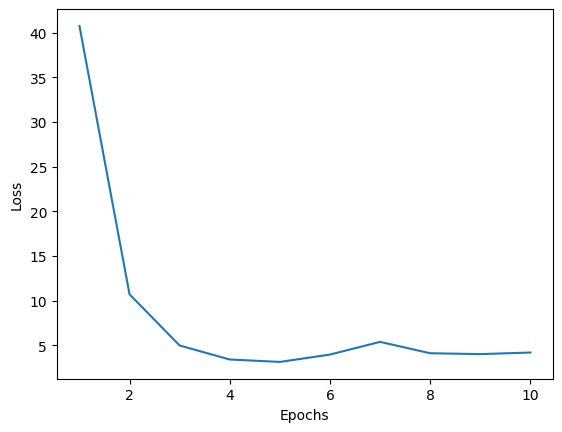

In [43]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [46]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  bias = layer.get_weights()[1]
  print(f"\nWeights:\n {weights} \nBiases:\n {bias}")


Weights:
 [[-0.04070428 -0.01958547 -0.20823546  0.0647565  -0.23682338  0.31763226
  -0.00613903 -0.19164579 -0.01545111 -0.00984028 -0.06928621 -0.18496734
   0.02622642  0.00478925  0.01803185  0.22456582 -0.03490735  0.00045988
  -0.00362502 -0.06320703  0.05849923  0.15207843  0.2547427   0.0223375
  -0.01859897  0.08380877  0.01847896  0.00591802 -0.1657013   0.00569046
  -0.01096841  0.13435352  0.05109288  0.0604175   0.09474915 -0.00467528
  -0.1587618   0.00947979  0.01306768 -0.00534616 -0.07588021 -0.22576319
  -0.10930693 -0.06028009 -0.03571172 -0.22818543 -0.01071899  0.2094118
  -0.380249    0.13586475  0.04867591  0.21238445  0.00107205  0.01156189
  -0.09232961  0.044051   -0.09055545  0.0334191  -0.03806141  0.01104547
   0.00798658 -0.01299648 -0.00825176  0.02479656]] 
Biases:
 [ 0.13373719  0.14925766  0.15985416  0.09773358  0.21611302 -0.12220666
  0.4037161   0.18257594  0.05566498  0.12413239  0.3807398   0.02572978
  0.21849258 -0.06390649 -0.2962323   0.061